<a href="https://colab.research.google.com/github/arjunkpreman/Transfer-Learning-Project/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [5]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # num_classes is the number of classes in your task

In [6]:

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3015 images belonging to 10 classes.


In [9]:
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 921 images belonging to 10 classes.


In [10]:
# Train the model
r=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=10
)

<ipython-input-10-07f1f0826cdd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
94/94 [==============================] - 817s 9s/step - loss: 0.6744 - accuracy: 0.7764 - val_loss: 0.3979 - val_accuracy: 0.8672
Epoch 2/10
94/94 [==============================] - 20s 208ms/step - loss: 0.1879 - accuracy: 0.9400 - val_loss: 0.2372 - val_accuracy: 0.9129
Epoch 3/10
94/94 [==============================] - 18s 195ms/step - loss: 0.1002 - accuracy: 0.9708 - val_loss: 0.2326 - val_accuracy: 0.9174
Epoch 4/10
94/94 [==============================] - 19s 207ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.2872 - val_accuracy: 0.8984
Epoch 5/10
94/94 [==============================] - 18s 195ms/step - loss: 0.0359 - accuracy: 0.9943 - val_loss: 0.2294 - val_accuracy: 0.9152
Epoch 6/10
94/94 [==============================] - 19s 206ms/step - loss: 0.0260 - accuracy: 0.9966 - val_loss: 0.1546 - val_accuracy: 0.9487
Epoch 7/10
94/94 [==============================] - 19s 207ms/step - loss: 0.0136 - accuracy: 0.9997 - val_loss: 0.1738 - val_accuracy: 0.9386
E

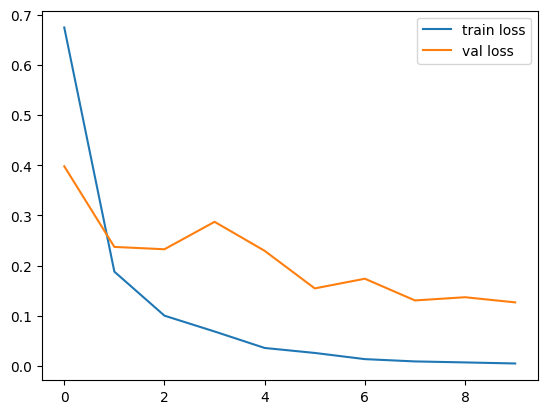

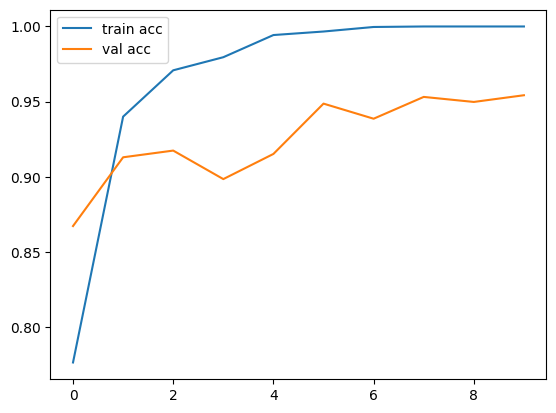

<Figure size 640x480 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# save it as a h5 file
model.save('/content/drive/MyDrive/Dataset/Model_ResNet50.h5')

In [13]:
model.evaluate(val_generator)

29/29 [==============================] - 6s 207ms/step - loss: 0.1233 - accuracy: 0.9555


[0.12334921211004257, 0.9554831981658936]